#### Importing packages

In [1]:
import math
import networkx 
from functools import reduce
import networkx as nx
from networkx.algorithms import bipartite
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as alg
from scipy.linalg import block_diag
from sklearn.tree import export_graphviz
import community as community_louvain
import matplotlib.cm as cm
import networkx.algorithms.community as nxcom
from community import community_louvain
import math
import networkx.algorithms.community as nx_comm
from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.community import kernighan_lin_bisection
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community import label_propagation_communities
from networkx.algorithms.community import greedy_modularity_communities


### Bipartivity Measure using using biparttivity index on randomly Bipartite

First we measure the bipartivity on the graph we created, to check if there are anti-communities, using $b_ \lambda = \frac{- \lambda_n}{\lambda_1}$ and $b_{e}$, these measurements, they have the bound. which is $0\geq b_{\lambda}\leq1$ and $0 \geq b_{e}\leq1$, this implies that if those measure they are greater or equal to 0 we dont have anti-communities, since it is a complete graph, but if they are less than or equal to 1, we have anti communities, since it is bipartite or approximately bipartite. For approximately bipartite, we will have good anti-communities, For those we have tested we have seen that they are approximaately and the value of $b_ \lambda$ and $b_ e$, $0.5$ is the one in which communities emerge, since it is approximately 1, but bellow $0,5$, it is not worthy to start lookink for anti communities. The $b_ e$ and $b_ \lambda$ measure takes values in the interval (0, 1].The upper bound is attained for bipartite graphs. It is
easy to see that $b_ e$ and $b_ \lambda$ cannot be lower than 0. From the results of the measurements wwe have observed that there are also networks that are not necessarily bipartite, but closer to bipartite than what can be expected from a completely random network.

I will start by generating a random matrx of zeros and 1,s, and find the density of it, and we can call it  random binary matrix, it does not have to be symmetric. For every entries on this matrix, we generate a random  number, if it is bigger than r, make that entry zero, and if it is smaller, then we make that entry 1, we will set r = 0.7

In [181]:
n=30;m=10
BA=nx.bipartite.random_graph(n,m,0.7)#r

After genereting the random matrx of zeros and 1,s, am going to plot the graph or network

### Visualize graph

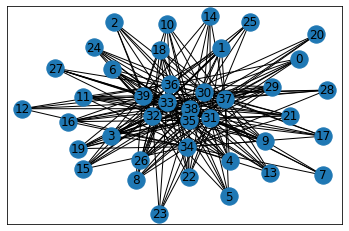

In [182]:
nx.draw_networkx(BA)

### Getting the adjacency matrix

In [183]:
Adj=nx.to_numpy_matrix(BA)
print(Adj)

[[0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


The above adjacency matrix, shows that our graph is a bipatite, as required.

Now we want to generate a random nearly-bipatite, we will have A1,A2 and B, which we got from our random matrix, we have generated above. A1 and A2 are p, we generate them using Erdos Renyi graphs, we set our p = 0.01, since we want we p to be much less than r.

In [184]:
#Erdos Renyi graph
A1=networkx.generators.random_graphs.erdos_renyi_graph(n,0.01)
A2=networkx.generators.random_graphs.erdos_renyi_graph(m,0.01)#p=0.01
                                                    

In [185]:
AA1=nx.to_numpy_matrix(A1)
AA2=nx.to_numpy_matrix(A2)

Now we will create a block diagonal matrix from provided arrays, A1 and A2

In [186]:
AA=block_diag(AA1,AA2)
AA

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Random nearly bipatite

Now we want to generate a random nearly-bipatite, using B, A1 and A2, we got above

In [187]:
#nearly-bipatite 
A=Adj+AA
print(A)

[[0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


## Plotting the graph of random nearly bipatite graph 

Now the nearly-bipitite graph(A), we will call it T

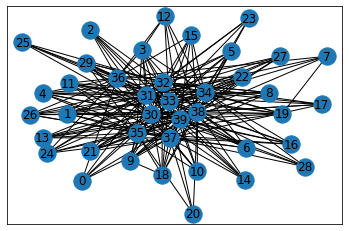

In [188]:
T = nx.convert_matrix.from_numpy_matrix(A)
nx.draw_networkx(T)

## Getting the adjacency matrix

In [189]:
Adj_T = nx.to_numpy_matrix(T)
print(Adj_T)

[[0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


Adj_T is our adjacency matrix, which we will use it when we are finding anti-communities of the original graph.

#  Bipartite graphs and bipartivity measures Bipartite and nearly-bipartite graphs

$b_ \lambda = - \lambda_n / \lambda_1$

In [190]:
def b_lambda(A):
    eig=np.linalg.eigh(A)[0]
    eig=sorted(eig,reverse=True)
    return -eig[-1]/eig[0]

In [191]:
b_lambda(Adj)

0.999999999999999

$b_{s}$

In [192]:
def b_s(A):
    eig=np.linalg.eigh(A)[0]
    Num=sum(np.cosh(eig))
    Den=sum(np.exp(eig))
    
    return Num/Den

In [193]:
b_s(Adj_T)

0.7608504027213033

$b_{e}$

In [194]:
def b_e(A):
    eig=np.linalg.eig(A)[0]
    Num=sum(np.exp(-eig))
    Den=sum(np.exp(eig))
    
    return Num/Den

In [195]:
b_e(Adj_T)

(0.5217008054426118+0j)

From the above observation or measure, we have observed that there are anti-communities, therefore we can use clustering methods to cluster the network

## Partitioning the network using spectral clustering, using most -ve eigenvalue of the original adjacency matrix,

In [196]:
#we take the communities from the Adjacency matrix
def divideqwerty(A,G,r=0):#step 1: we define r here
    """Function to divide a Network into two subgraphs
    using the Fiedler's theorem
    """
    #take the eig of A
    a,v=np.linalg.eig(A)
    
    #step 2, getting the eigenvector of the most negative eigenvalue of adjacency matrix
    max_eig=sorted(a)[0]
    ind=0
    for i in range(len(a)):
        if a[i]==max_eig:
            ind=i
    vf=np.asarray(v[:,ind]).reshape(-1)
    fv={}
    for k,nodes in enumerate(G.nodes):
        fv[nodes]=vf[k]
    
    #step 3, Assigning the empty lists, to separate pos and negative vectors
    Sub1=[]
    Sub2=[]
    
    #step 4
    for nodes in G.nodes: # Looping through, to separate negative and pos, the append them in different list
        if fv[nodes]>=r: # checking if vector is greater or equal to zero, then if it is, it means it is positive
            Sub1.append(nodes) # append the positive ones in Sub1 list
        else:
            Sub2.append(nodes) # append the negative ones, in sub2 list, from fiedlervector
    Graph1=G.subgraph(Sub1) # Assign the Positive ones from the fiedler, to Graph1
    Graph2=G.subgraph(Sub2) # Assign the Negative ones from the fiedler, to Graph2
    
    
    return Graph1 , Graph2

In [197]:
#anti- community from the adjacency matrix of Adj_T
GGraph1,GGraph2=divideqwerty(Adj,BA)

## Computing the modularity After partitioning the graph

Below is the modularity of bipartite graph, generated above, that's why is is $\frac{1}{2}$

In [199]:
nx_comm.modularity(BA, divideqwerty(Adj,BA))

-0.5

### visualising the network after partitioning it.

In [174]:
def visualisee(G,G1,G2):
    """Visualise the network after splitting it 
    """
    
    plt.figure(figsize=(20,15)) # Defining the size of the plot
    col=[] # empty list for color
    size=[] # empty list for the size of the plot
    for nodes in G.nodes:
        if nodes in G1.nodes:
            col.append('r') # Appending the color red to the positive vectors, found in fiedler vector
            size.append(300)
        else:
            col.append('cyan')  # Highlighting the nodes with the negative vector in the fiedler vector, by light green
            size.append(300)
    nx.draw_networkx(G,node_color=col,node_size=size,alpha=0.7)
    plt.show()

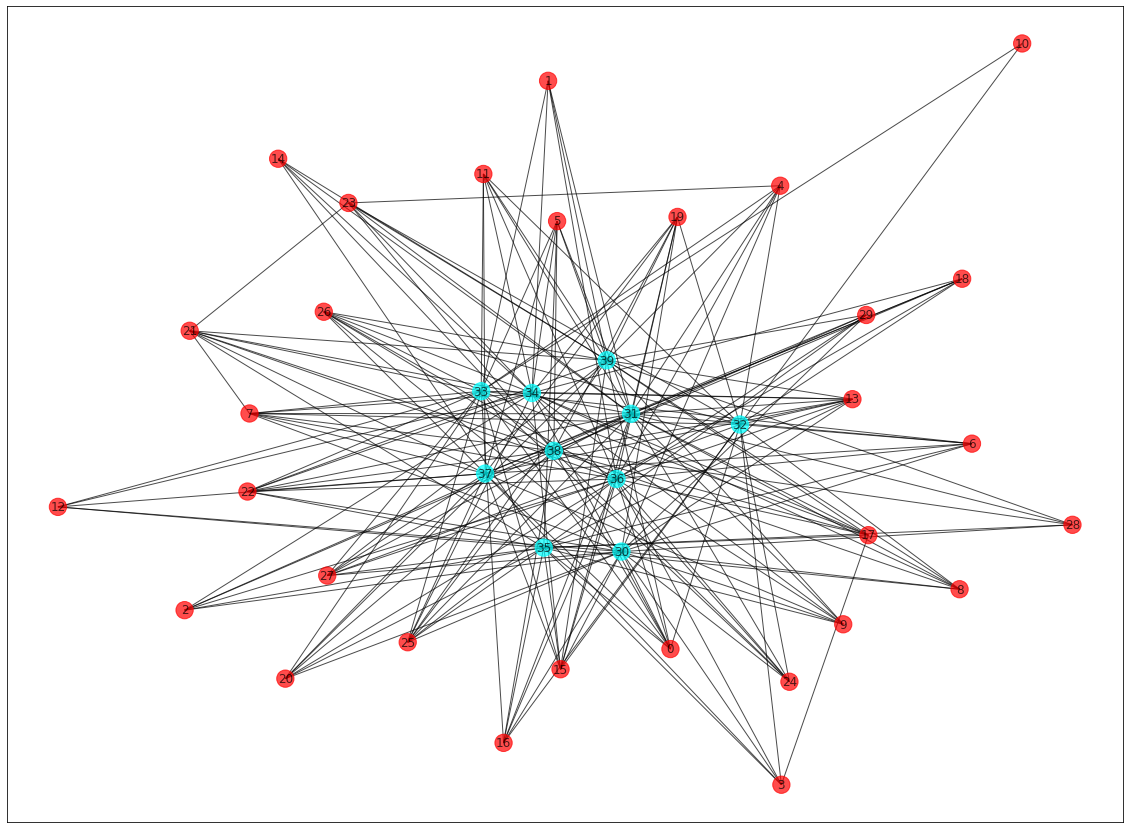

In [180]:
visualisee(T,GGraph1,GGraph2)

### Anti-Communities of Graph T

We are going to find the complement matrix, which was constructed using the dajacency matrix of the original graph, then after that we wiil find it's communities using the laplacian matrix,which is ant-communities of a bipartite graph, compare against anti-communities found using most -ve eigenvalue of the original adjacency matrix 

## Complement matrix of adjacency marix A

In [200]:
H=np.ones((len(Adj_T),len(Adj_T)))-np.identity(len(Adj_T))-Adj_T
print(H)

[[0. 1. 1. ... 0. 0. 1.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 1. 1. 0.]
 ...
 [0. 0. 1. ... 0. 1. 1.]
 [0. 0. 1. ... 1. 0. 1.]
 [1. 0. 0. ... 1. 1. 0.]]


### Plotting the graph of complement matrix

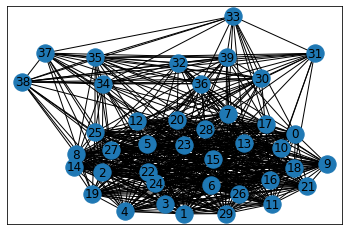

In [201]:
v = nx.convert_matrix.from_numpy_matrix(H)
nx.draw_networkx(v)

### calculate the graph Simple Laplacian L2=D2-H  of adjacency marix H

In [202]:
n2=len(v)
e2=np.ones((n2,1))
D2=np.diag(np.asarray(np.dot(H,e2)).reshape(-1))
L2=D2-H
print(L2)

[[33. -1. -1. ...  0.  0. -1.]
 [-1. 31. -1. ...  0.  0.  0.]
 [-1. -1. 33. ... -1. -1.  0.]
 ...
 [ 0.  0. -1. ... 16. -1. -1.]
 [ 0.  0. -1. ... -1. 16. -1.]
 [-1.  0.  0. ... -1. -1. 19.]]


In [203]:
def fied_vect22(L,G):
    """Function to find the fiedler vector from the Laplacian Matrix
    """
    eigenval,eigenvec = np.linalg.eig(L)#eigenvalues and eigenvctor of the laplacian
    
    #take the second smallest eigenvalues
    lamda=sorted(eigenval)[1]
    index=0 #our index
    for i in range(len(eigenval)):
        if eigenval[i]==lamda:
            index=i
    fied=np.asarray(eigenvec[:,index]).reshape(-1)#fiedler vector
    
    #associate it with the nodes of G
    FV={}
    i=0
    for nodes in G.nodes:
        FV[nodes]=fied[i]
        i+=1
        
    return FV

In [204]:
fied_vect22(L2,T)

{0: -0.057698134052524046,
 1: -0.09764573272691995,
 2: -0.06495184964834844,
 3: -0.11300463871824054,
 4: -0.10440773157428085,
 5: -0.07720379394882235,
 6: -0.10050724866486661,
 7: -0.031846092279767216,
 8: -0.09103748817388385,
 9: -0.11546175295635924,
 10: -0.05899963794810238,
 11: -0.09996773692547427,
 12: -0.05352612915725177,
 13: -0.07126255716797404,
 14: -0.07978865588240844,
 15: -0.07394960396937156,
 16: -0.08481554020012456,
 17: -0.056589184356519724,
 18: -0.09283233268956242,
 19: -0.10033336485796399,
 20: -0.05412187906031609,
 21: -0.10387485594443392,
 22: -0.09440509545345116,
 23: -0.06209679560107856,
 24: -0.07986708803593347,
 25: -0.05471431671394057,
 26: -0.09747815158477682,
 27: -0.07360740271062947,
 28: -0.05750218294125446,
 29: -0.11006906608574296,
 30: 0.17986098700596356,
 31: 0.3204102362797663,
 32: 0.10826128778016911,
 33: 0.6221172195131984,
 34: 0.15763010914668402,
 35: 0.1948964370404014,
 36: 0.09679056834573124,
 37: 0.25204525488

### dividing the network into two subgraphs

In [205]:
def divide22(L,G,r=0):#step 1: we define r here
    """Function to divide a Network into two subgraphs
    using the Fiedler's theorem
    """
    
    #step 2
    fv=fied_vect22(L,G) # assigning the vectors from the fiedlervector
    
    #step 3, Assigning the empty lists, to separate pos and negative vectors
    Sub1=[]
    Sub2=[]
    
    #step 4
    for nodes in G.nodes: # Looping through, to separate negative and pos, the append them in different list
        if fv[nodes]>=r: # checking if vector is greater or equal to zero, then if it is, it means it is positive
            Sub1.append(nodes) # append the positive ones in Sub1 list
        else:
            Sub2.append(nodes) # append the negative ones, in sub2 list, from fiedlervector
    Graph1=G.subgraph(Sub1) # Assign the Positive ones from the fiedler, to Graph1
    Graph2=G.subgraph(Sub2) # Assign the Negative ones from the fiedler, to Graph2
    
    
    return Graph1 , Graph2

In [206]:
#Divide the network v,using the Laplacian L2 
G112,G122=divide22(L2,T)

## Computing the modularity After partitioning the graph

The modularity of a graph, which is not bipartite

In [207]:
nx_comm.modularity(T, divide22(L2,T))

-0.47642621929512285

### visualising the network after partitioning it.

In [134]:
def visualiseev(G,G1,G2):
    """Visualise the network after splitting it 
    """
    
    plt.figure(figsize=(20,15)) # Defining the size of the plot
    col=[] # empty list for color
    size=[] # empty list for the size of the plot
    for nodes in G.nodes:
        if nodes in G1.nodes:
            col.append('r') # Appending the color red to the positive vectors, found in fiedler vector
            size.append(300)
        else:
            col.append('cyan')  # Highlighting the nodes with the negative vector in the fiedler vector, by light green
            size.append(300)
    nx.draw_networkx(G,node_color=col,node_size=size,alpha=0.7)
    plt.show()

The graph bellow is the anti-communities of a bipartite, which is found by find communities of the complement using the Laplacian

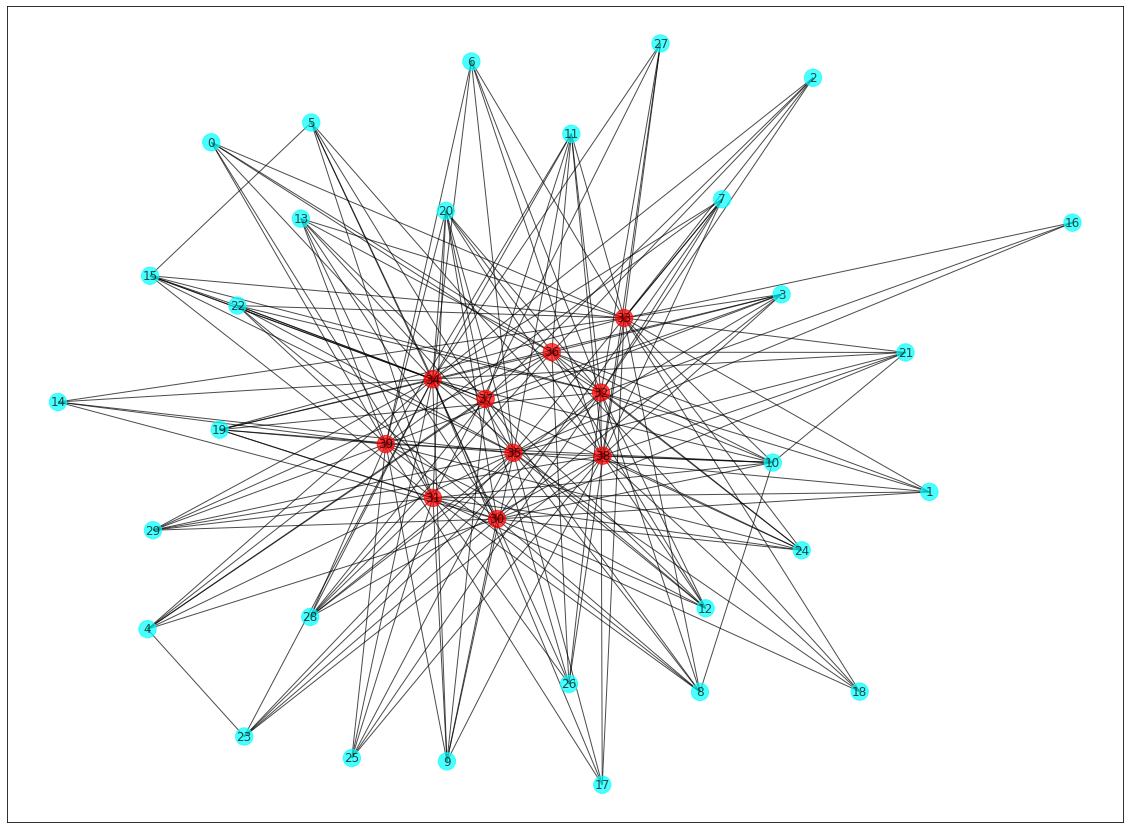

In [135]:
visualiseev(T,G112,G122)